28-23F
left: (0, 0)
right: (255, 196)
top: (0, 0)
bottom: (0, 255)


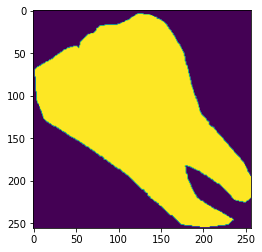

In [1]:
import cv2 
import numpy as np
import glob,os
from matplotlib import pyplot as plt
from PIL import Image
    
inputdir = "/content/"
outputdir = "/content/"
        
for img1 in sorted(glob.glob( inputdir + "*.jpg")):
        
        img_path = img1.split('/')[-1]
        imgstr = img_path.split('.')[0]
        
        print(imgstr)
        im1 = cv2.imread(img1,0)
        thresh = cv2.threshold(im1, 100, 255, cv2.THRESH_BINARY)[1]
        #calculates nonzero pixels 
        x, y, w, h = cv2.boundingRect(im1)

        left = (x, np.argmax(thresh[:, x]))             
        right = (x+w-1, np.argmax(thresh[:, x+w-1]))    
        top = (np.argmax(thresh[y, :]), y)              
        bottom = (np.argmax(thresh[y+h-1, :]), y+h-1) 
        
        print('left: {}'.format(left))
        print('right: {}'.format(right))
        print('top: {}'.format(top))
        print('bottom: {}'.format(bottom))
        
        cropped__img = thresh[top[1]:bottom[1], left[0]:right[0]]
        cropped__img = cv2.resize(cropped__img, (256,256), interpolation=cv2.INTER_LINEAR)
        
        save_fname = os.path.join(outputdir, os.path.basename(imgstr)+'.jpg')
        cv2.imwrite(save_fname, cropped__img)
        plt.imshow(cropped__img)